# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 

## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 



#Μαρκουλέσκου Έλενα-Μπιάνκα 03115126

#Ομάδα Α46

In [1]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.16.0)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.23.4)
Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.2)


## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [0]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
# make direct link for drive docs this way https://www.labnol.org/internet/direct-links-for-google-drive/28356/
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

##team_seed_number = 46

In [0]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 46

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [57]:
ID = 357
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])
print(catbins.shape)

['Dangerous Liaisons']
['"Mystery",  "Romance Film",  "Drama"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="50%">

## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus).toarray()


In [6]:
print(corpus_tf_idf.shape)

(5000, 48687)


## Υλοποίηση του συστήματος συστάσεων


Η contend_recommender υπολογίζει την **απόσταση συνημιτόνου** της ζητούμενης ταινίας με τις υπόλοιπες. Όσο πιο μικρή η απόσταση τόσο πιο μεγάλη η ομοιότητα, που σημαίνει πως το σύστημα θα μας προτείνει κάθε φορά τις ταινίες που έχουν τη μικρότερη απόσταση από τη ταινία που εισάγουμε. Η ίδια η ταινία έχει απόσταση 0 από τον εαυτό της, συνεπώς το index της θα βρίσκεται στην πρώτη θέση του πίνακα που προκύπτει από την argsort.
- Για την ταινία-στόχο εκτυπώνουμε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες με τη μεγαλύτερη ομοιότητα συνημιτόνου (άρα τη μικρότερη απόσταση) (σε φθίνουσα σειρά), τυπώνουμε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)

In [0]:
import scipy as sp

In [0]:
def content_recommender(target_movie, max_recommendations=5):
  cos = []
  for idd in range(0,len(titles)):
    cos.append(sp.spatial.distance.cosine(corpus_tf_idf[target_movie, :], corpus_tf_idf[idd, :]))
  
  idx = np.argsort(cos)    #κάνουμε sort από το μιρκότερο στο μεγαλύτερο αφού όσο πιο μεγάλη η ομοιότητα, τόσο πιο μικρή η απόσταση συνημιτόνου
                           #η ταινία έχει απόσταση 0 από τον εαυτό της και ομοιότητα 1
  #print(idx)
  
  print("Target Movie")
  print("Title:", titles[idx[0]])
  print("ID:", idx[0])
  print("Summary:", corpus[idx[0]])
  print("Genres:", categories[idx[0]])
  print("\n")
  
  print("{} most recommended movies based on content".format(max_recommendations))
  for rec in range(1, max_recommendations+1):
    print("Recommended Movie No. {}".format(rec))
    print("Title:", titles[idx[rec]])
    print("ID:", idx[rec])
    print("Summary:", corpus[idx[rec]])
    print("Genres:", categories[idx[rec]])
    print("\n")
    

In [9]:
content_recommender(0, 8)

Target Movie
Title: ['Halloween']
ID: 0
Summary:  On Halloween in Haddonfield, Illinois, having already shown signs of psychopathic tendencies, ten-year-old Michael Myers  murders a school bully named Wesley , later his own sister Judith , his mother’s boyfriend Ronnie ([[William Forsythe , and Judith's boyfriend Steve . After one of the longest trials in the state’s history, Michael is found guilty of first degree murder and sent to Smith's Grove - Warren County Sanitarium under the care of child psychologist Dr. Samuel Loomis . Michael initially cooperates with Dr. Loomis, claiming no memory of the killings; his mother, Deborah , visits him regularly. After a year, Michael becomes fixated on his papier-mâché masks, closing himself off from everyone, even his mother. When Michael kills a nurse  as Deborah is leaving from one of her visits, she can no longer handle the situation and commits suicide. For the next fifteen years, Michael  continues making his masks and not speaking to any

Με **απλή αρχικοποίηση** του TfidfVectorizer η contend_recommender για την ταινία **Halloween (ID = 0)** δίνει τα αποτελέσματα που φαίνονται παραπάνω. Παρατηρούμε πως τα πάει καλά για τις 2 πρώτες ταινίες που προτείνει ('Halloween (ID = 816)' και 'Halloween H20: 20 Years Later (ID = 1975)'), αλλά οι υπόλοιπες δεν έχουν τόσο μεγάλη σχέση με τη δοσμένη ταινία, οι ρομαντικές αυτές κομεντί ή δράματα δεν έχουν τίποτα κοινό με το αρχικό μας θρίλλερ.

---

Άλλες ταινίες με τις οποίες δουλέψαμε για τη βελτιστοποίηση ήταν οι **"When Harry met Sally..." (ID = 3648)** και **"The Godfather part ||" (ID = 1328)** των οποίων τα βέλτιστα αποτελέσματα θα παρουσιάσουμε παρακάτω.

## Βελτιστοποίηση

##Η διαδικασία που ακολουθούμε είναι η παρακάτω:


*  Αποφασίζουμε να κάνουμε Stemming στις λέξεις και όχι Lemmatization. Αυτό γιατί παρατηρήσαμε πως το πρώτο δουλεύει καλύτερα (με τις default παραμέτρους του) σε σχέση με το δεύτερο, όπου χρειάζεται για κάθε λέξει να ορίζουμε τι μέρος του λόγου είναι για να εξάγει ο Lemmatizer τις σωστές λέξεις (όπως εξηγείται σε αυτό το [link](https://stackoverflow.com/questions/32957895/wordnetlemmatizer-not-returning-the-right-lemma-unless-pos-is-explicit-python))

* Ο TfidfVectorizer δε δίνει built-in τη δυνατότητα να κάνουμε την αφαίρεση κατάληξης, συνεπώς φτιάχνουμε δικό μας tokenizer (με τη συνάρτηση mytokenizer) η οποία παράλληλα με το χωρισμό των λέξεων θα αφαιρεί και τις καταλήξεις.

* Επόμενο βήμα είναι να αφαιρέσουμε τα stop words. Σε αυτά θα προσθέσουμε και μια δική μας λίστα από λέξεις που δεν προσφέρουν ουσία στα κείμενά μας. Αυτό γίνεται με τη διαδικασία που περιγράφεται [εδώ](https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list/24386751#24386751)

* Τέλος, μένει να πειραματιστούμε με τις υπερπαραμέτρους του vectorizer για να βρούμε αυτές που επιφέρουν τα καλύτερα αποτελέσματα για το dataset μας.

In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('rslp')
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [0]:
#Φτιάχνουμε δικό μας tokenizer ο οποίος θα κάνει και word stemming αφού αυτή η δυναντότητα δε μας δίνεται built-in από τον TfidfVectorizer
stem = PorterStemmer()

def mytokenizer(text):
  tokens = [word for word in nltk.word_tokenize(text, language = 'english') if len(word)>1] #κάνουμε tokenization και παράλληλα αφαιρούμε
                                                                                            #τις λέξεις που αποτελούνται από ένα γράμμα
  
  tokens = [word.strip(string.punctuation) for word in tokens] #αφαιρούμε τυχόν σημεία στίξης από τις λέξεις
  thorough = [word for word in tokens if len(word)>1] #μετά το strip ενδέχεται να έχουν μείνει "κενές" λέξεις (αυτές που πριν αποτελούνταν μόνο από σημεία στίξης)
  stems = [stem.stem(word) for word in thorough]
  return stems

In [0]:
#Μετά το tokenization επόμενο βήμα είναι να βγάλουμε τα stop words.
#Θα προσθέσουμε στη λίστα των stop words και δικές μας λέξεις όπως film, movie, plot κ.λπ.

from sklearn.feature_extraction import text 

words_to_be_excluded = ['film', 'scene', 'theme', 'movie', 'plot', 'segment', 'characters', 'films']
mystopwords = text.ENGLISH_STOP_WORDS.union(words_to_be_excluded)


In [13]:
#Δοκιμάζουμε τον δικό μας tokenizer. Φαίνεται να δουλεύει καλά.
doc = 'this \'document is for ..testing.... ' ' '' ... o is a mistake, it should be removed. is my function really stemming? ..–. ..-.! is the word film making it?'

vect = TfidfVectorizer(tokenizer = mytokenizer, stop_words = mystopwords)
vect.fit([doc])
analyzer = vect.build_analyzer()
print(analyzer(doc))

['thi', 'document', 'test', 'mistak', 'remov', 'function', 'realli', 'stem', 'word', 'make']


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'charact', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'movi', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop

In [14]:
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.8, min_df = 5, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.5, min_df = 5, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.5, min_df = 50, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.4, min_df = 10, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.4, min_df = 7, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.3, min_df = 3, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.01, min_df = 3, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.05, min_df = 5, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.05, min_df = 3, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.05, min_df = 5, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.05, min_df = 50, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.1, min_df = 10, stop_words = mystopwords)
#vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.01, min_df = 5, stop_words = mystopwords)

vectorizer = TfidfVectorizer(tokenizer = mytokenizer, max_df = 0.01, min_df = 4, stop_words = mystopwords)
%time vectorizer.fit(corpus)
%time corpus_tf_idf = vectorizer.transform(corpus).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'charact', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'movi', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop

CPU times: user 50.2 s, sys: 11.6 ms, total: 50.2 s
Wall time: 50.3 s
CPU times: user 50.1 s, sys: 231 ms, total: 50.3 s
Wall time: 50.3 s


In [108]:
print(corpus_tf_idf.shape)
print(vectorizer.get_feature_names())
print(corpus_tf_idf)

(5000, 8664)
['1,000', '1,500', '10,000', '10-year-old', '100', '100,000', '1000', '10th', '11', '11-year-old', '12', '12-year-old', '12th', '13', '13-year-old', '13th', '14', '14th', '15', '15,000', '15-year-old', '150', '15th', '16', '16-year-old', '16th', '17', '17-year', '17-year-old', '17th', '18', '18-year-old', '1849', '1865', '1890', '18th', '19', '19-year-old', '1900', '1905', '1910', '1912', '1914', '1916', '1917', '1918', '1919', '1920', '1921', '1923', '1925', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1950', '1951', '1953', '1954', '1955', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1982', '1983', '1984', '1985', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '19

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Επεξήγηση επιλογών και ποιοτική ερμηνεία



Για τη βέλτιστη αρχιτεκτονική επιλέγουμε max_df 0.01 και min_df = 4. Αυτό σημαίνει ότι αφαιρούμε όλες τις λέξεις που εμφανίζονται σε λιγότερο από 5 περιλήψεις αλλά και σε περισσότερο από το 0.01% των περιλήψεων (δηλαδή περισσότερες από 50). Παρόλο που το ποσοστό φαίνεται μιρκό, δεν είναι παράλογο αν σκεφτεί κανείς πως θέλουμε να κρατήσουμε τις πιο σπάνιες λέξεις, γιατί αυτές διαφοροποιούν τα κείμενα μεταξύ τους (πετάμε όμως τις πολύ σπάνιες αφού εφόσον συναντώνται σε πολύ λίγα κείμενα δεν προσφέρουν ομοιότητα με τα υπόλοιπα). 

Εξάλλου, ακόμα και με αυτό το πολύ μικρό φαινομενικά ποσοστό το vocabulary μας έχει 8664 λέξεις-χαρακτηριστικά και (με δεδομένο πως αρχικά είχαμε 48687) οι διαστάσεις δε μειώθηκαν τρομερά, όπως θα περίμενε κανείς.

Να σημειώσουμε εδώ πως, αφού κρατάμε τις λέξεις που βρίσκονται σε τόσο χαμηλό ποσοστό κειμένων, πιθανότατα χρειάζεται η λίστα των δικών μας stopwords (αφού αυτές θα αφαιρούνταν λόγω της μεγάλης συχνότητάς τους). Παρόλα αυτά την κρατάμε για να είμαστε σίγουροι πως αυτές οι λέξεις πράγματι δε λαμβάνονται υπόψη από το μοντέλο μας.

In [107]:
content_recommender(3648, 8)

/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target Movie
Title: ['When Harry Met Sally...']
ID: 3648
Summary: The movie is framed with interviews with elderly couples telling stories about their relationships. Several stories are told throughout the movie. The story begins in 1977. Harry Burns  and Sally Albright  finish college at the University of Chicago and meet when both need someone to share a drive to New York City, where Sally is beginning journalism school and Harry is presumably starting a career; at the time, Harry is dating a friend of Sally's, Amanda . The film's underlying theme arises from their differing ideas about relationships between men and women which emerge during this journey. Harry evinces the view that "Men and women can't be friends because the sex part always gets in the way" ... even with ones "he finds unattractive". Sally disagrees, claiming that men and women can be strictly friends without sex. On the way, at a stop in a diner, Sally is angered when Harry tells her she is attractive; she accuses 

#Παραδείγματα προτεινόμενων ταινιών

Θα παραλείψουμε τα summaries για λόγους εξοικονόμησης χώρου.

##1
Target Movie

**Title: ['The Godfather Part II']**

ID: 1328

Genres: ['"Crime Fiction",  "Gangster Film",  "Drama",  "Crime Drama"']


##Common words: father, kill, friend, police
___
8 most recommended movies based on content

Recommended Movie No. 1

Title: ['Offside']

ID: 1729


Genres: ['"Drama"']


___
Recommended Movie No. 2

Title: ['The End']

ID: 1993


Genres: ['"Black comedy",  "Comedy"']

___

Recommended Movie No. 3

Title: ['The Fast and the Furious']

ID: 23

Genres: ['"Crime Fiction",  "Detective",  "Action/Adventure",  "Mystery",  "Drama",  "Action"']

___

Recommended Movie No. 4

Title: ['Smooth Talk']

ID: 3813



Genres: ['"Crime Fiction",  "Indie",  "Coming of age",  "Romantic drama",  "Drama",  "Romance Film"']


___
Recommended Movie No. 5

Title: ["Weekend at Bernie's"]

ID: 366


Genres: ['"Buddy film",  "Adventure",  "Screwball comedy",  "Comedy",  "Black comedy",  "Comedy of Errors",  "Slapstick"']


___

Recommended Movie No. 6

Title: ['Sphodanam']

ID: 3327

Genres: ['"Family Film"']

___
Recommended Movie No. 7

Title: ['Shark in Venice']

ID: 1937

Genres: ['"Thriller",  "Natural horror films",  "B-movie",  "Action",  "Horror"']

___
Recommended Movie No. 8

Title: ['Mumsy, Nanny, Sonny and Girly']

ID: 4307


Genres: ['"Crime Fiction",  "Comedy film",  "Horror",  "Slasher"']



##2
Target Movie

**Title: ['Halloween']**

ID: 0

Genres: ['"Cult",  "Horror",  "Slasher"']

##Common words: kill, house, body, Annie
___
8 most recommended movies based on content

Recommended Movie No. 1

Title: ['Halloween']

ID: 816

Genres: ['"Thriller",  "Horror",  "Indie",  "Cult",  "Slasher",  "Teen"']


___
Recommended Movie No. 2

Title: ['Halloween H20: 20 Years Later']

ID: 1975

Genres: ['"Cult",  "Drama",  "Horror",  "Slasher",  "Teen"']

___

Recommended Movie No. 3

Title: ['Good Day for a Hanging']

ID: 538

Genres: ['"Action/Adventure",  "Western",  "Action"']

___
Recommended Movie No. 4

Title: ['Gun Crazy']

ID: 2065


Genres: ['"Thriller",  "Crime Fiction",  "Indie",  "Black-and-white",  "Drama",  "Crime Thriller",  "Film noir"']

___
Recommended Movie No. 5

Title: ['The Last Voyage']

ID: 4728

Genres: ['"Disaster",  "Action/Adventure",  "Action",  "Drama"']


___
Recommended Movie No. 6

Title: ['First Monday in October']

ID: 4432

Genres: ['"Romantic comedy",  "Comedy-drama",  "Drama",  "Comedy",  "Political cinema",  "Romantic drama",  "Romance Film",  "Political drama"']

___
Recommended Movie No. 7

Title: ['Stay Alive']

ID: 2581

Genres: ['"Thriller",  "Horror",  "Slasher",  "Teen"']

___
Recommended Movie No. 8

Title: ['Paappi Appacha']

ID: 1253

Genres: ['"Comedy-drama"']


##3
Target Movie

**Title: ['The Vow']**

ID: 5

Genres: ['"Romance Film",  "Drama"']

##Common words: Leo, Paige, help, friend
___
8 most recommended movies based on content

Recommended Movie No. 1

Title: ['Green Light']

ID: 322

Genres: ['"Romance Film",  "Drama"']

___
Recommended Movie No. 2

Title: ['La Leyenda de la Llorona']

ID: 664

Genres: ['"Comedy film",  "Horror",  "Adventure",  "Animation"']

___
Recommended Movie No. 3

Title: ['Choke']

ID: 3827

Genres: ['"Sex comedy",  "Indie",  "Drama",  "Comedy",  "Film adaptation",  "Black comedy"']

___
Recommended Movie No. 4

Title: ['Fix']

ID: 638

Genres: ['"Crime Fiction",  "Drama",  "Indie"']

___
Recommended Movie No. 5

Title: ['Paradise Lost']

ID: 931

Genres: ['"Musical",  "Drama"']

___
Recommended Movie No. 6

Title: ['The Blue Dahlia']

ID: 2075

Genres: ['"Thriller",  "Crime Fiction",  "Black-and-white",  "Mystery",  "Drama",  "Crime Thriller",  "Film noir"']

___
Recommended Movie No. 7

Title: ['The Flats']

ID: 240

Genres: ['"Drama",  "Coming of age",  "Comedy-drama",  "Indie",  "Comedy"']

___
Recommended Movie No. 8

Title: ['The Kid Brother']

ID: 3455

Genres: ['"Crime Fiction",  "Silent film",  "Indie",  "Black-and-white",  "Comedy"']

##4
Target Movie
**Title: ['Dumb & Dumberer: When Harry Met Lloyd']**

ID: 4889

Genres: ['"Screwball comedy",  "Buddy film",  "Comedy",  "Teen",  "Slapstick"']

##Common words: Lloyd, mother, father
___
8 most recommended movies based on content

Recommended Movie No. 1

Title: ['The Stranger In Between']

ID: 100

Genres: ['"Buddy film"']

___
Recommended Movie No. 2

Title: ['Lloyd the Conqueror']

ID: 275

Genres: ['"Comedy"']

___
Recommended Movie No. 3

Title: ['Lloyd']

ID: 2421

Genres: ['"Family Film",  "Drama",  "Comedy",  "Children\'s/Family"']

___
Recommended Movie No. 4

Title: ['Fright']

ID: 1439

Genres: ['"Horror",  "Slasher",  "Suspense"']

___
Recommended Movie No. 5

Title: ["Get Smart's Bruce & Lloyd Out of Control"]

ID: 4992

Genres: ['"Action/Adventure",  "Action",  "Comedy"']

___
Recommended Movie No. 6

Title: ['Lost and Found on a South Sea Island']

ID: 2069

Genres: ['"Silent film",  "Melodrama",  "Drama",  "Adventure",  "Black-and-white"']

___

Recommended Movie No. 7

Title: ['Trauma']

ID: 3873

Genres: ['"Thriller",  "Mystery",  "Horror",  "Slasher",  "Psychological thriller"']

___
Recommended Movie No. 8

Title: ['Familles je vous hais

ID: 3660

Genres: ['"Drama"']


##5
Target Movie

**Title: ['When Harry Met Sally...']**

ID: 3648

Genres: ['"Romantic comedy",  "Romance Film",  "Drama",  "Comedy"']

##Common words: Sally, friend, new
___
8 most recommended movies based on content

Recommended Movie No. 1

Title: ["David's Mother"]

ID: 851

Genres: ['"Family Drama",  "Drama",  "Television movie"']

___

Recommended Movie No. 2

Title: ['The Two Mrs. Carrolls']

ID: 619

Genres: ['"Thriller",  "Melodrama",  "Psychological thriller",  "Black-and-white",  "Drama",  "Film noir"']

__
Recommended Movie No. 3

Title: ['The New Pupil']

ID: 1001

Genres: ['"Short Film",  "Family Film",  "Comedy",  "Black-and-white"']

---

Recommended Movie No. 4

Title: ['The Battle at Elderbush Gulch']

ID: 2928

Genres: ['"Short Film",  "Silent film",  "Western",  "Black-and-white",  "Indie"']

___
Recommended Movie No. 5

Title: ['American Dreamz']

ID: 1185

Genres: ['"Political cinema",  "Parody",  "Political satire",  "Comedy",  "Media Satire"']

___
Recommended Movie No. 6

Title: ["You're Not Elected, Charlie Brown"]

ID: 629

Genres: ['"Short Film",  "Family Film",  "Drama",  "Animation"']

___
Recommended Movie No. 7

Title: ['Under the Mud']

ID: 1819

Genres: ['"Comedy"']

___
Recommended Movie No. 8

Title: ['The Stranger']

ID: 1659

Genres: ['"Action"']

##Άλλα παραδείγματα

Για τις παραπάνω ταινίες παρατηρούμε πως όσο προχωράμε στις συστάσεις προς τα κάτω το μοντέλο δεν είναι το ίδιο καλό για όλες, αλλά σε γενικές γραμμές, για τις πρώτες 5 προτεινόμενες ταινίες, το μοντέλο μας ικανοποιεί.

Άλλες ταινίες που δοκιμάσαμε και δίνουν ικανοποιητικά αποτελέσματα είναι οι:


*   The curse of Frankenstein, ID=200
*   The fast and the Furious, ID=23
*   The Knight Rider, ID=1228



In [17]:
#Αποθήκευση
from sklearn.externals import joblib
joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl')

['corpus_tf_idf.pkl']



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [18]:
!ls -lh

total 331M
-rw-r--r-- 1 root root 331M Jan 17 14:27 corpus_tf_idf.pkl
drwxr-xr-x 1 root root 4.0K Jan  8 17:15 sample_data


In [20]:
from google.colab import files
files.download('corpus_tf_idf.pkl') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 33016, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

και μπορούμε να τα διαβάσουμε με `joblib.load`

In [0]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Σημασιολογική απεικόνιση της συλλογής ταινιών με χρήση SOM
<img src="http://visual-memory.co.uk/daniel/Documents/intgenre/Images/film-genres.jpg" width="35%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους. 

Έχουμε ήδη μετατρέψει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή για να μπορέσουμε να τη χρησιμοποιήσουμε στη συνάρτηση content_recommender.
Άρα δε χρειάζεται να το κάνουμε στη `build_final_set`.

In [0]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [0]:
final_set = build_final_set(2000)

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [0]:
final_set.shape

* Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

Κατά μια έννοια, variance threshold έχουμε εφαρμόσει ήδη, αφού με τα min_df και max_df έχουμε αποκλείσει λέξεις που συναντώνται σε πολύ μικρό και πολύ μεγάλο ποσοστό των κειμένων. Λόγω του ορισμού των td και idf, τα αποτελέμσατά μας είναι ήδη κανονικοποιημένα, συνπεώς δε θα είχε νόημα να εφαρμόσουμε κάποιον από τους scalers. Oversampling εδώ δε θα μπορούσαμε να κάνουμε καθώς πρόκειται για μη επιβλεπόμενη μάθηση και δεν έχουμε εκ των προτέρων τις ετικέτες των κλάσεων. 
Συνεπώς, το βήμα προεπεξεργασίας που θα μπορούσαμε να εφαρμόσουμε εδώ θα ήταν feature exctraction με το PCA.

In [0]:
from sklearn.decomposition import PCA

comps = 1500
pca = PCA(n_components=comps)
final_set = pca.fit_transform(final_set)

In [0]:
from matplotlib import pyplot as plt

[0.07501625 0.13722974 0.18543848 ... 0.9802679  0.9803246  0.9803812 ]


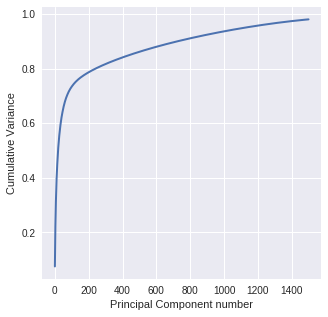

In [27]:
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Παρατηρούμε ότι με 1500 μόνο components (έναντι των 8986 αρχικών χαρακτηριστικών) εξηγούμε το 98% της πληροφορίας.

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [28]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

    100% |████████████████████████████████| 6.2MB 6.6MB/s 
  Running setup.py bdist_wheel for somoclu ... - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu


Θα βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινά με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (2000). Χρησιμοποιούμε την `time` για να έχουμε μια εικόνα των χρόνων εκπαίδευσης. 

In [29]:
n_rows, n_columns = 10, 10
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(final_set, epochs = 100)

CPU times: user 1min 50s, sys: 141 ms, total: 1min 50s
Wall time: 57.4 s



## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύουμε τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία.  Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) αποθηκεύουμε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. 


In [30]:
bmus = som.bmus
print(bmus.shape)
#print(bmus)

(2000, 2)


In [35]:
import sys
np.set_printoptions(threshold=sys.maxsize)  #just to show the entire array

ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus)
print(indices)

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [0 7]
 [0 8]
 [0 9]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [1 9]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [2 7]
 [2 8]
 [2 9]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [4 7]
 [4 8]
 [4 9]
 [5 0]
 [5 1]
 [5 2]
 [5 4]
 [5 5]
 [5 6]
 [5 7]
 [5 8]
 [5 9]
 [6 0]
 [6 1]
 [6 2]
 [6 3]
 [6 5]
 [6 6]
 [6 7]
 [6 8]
 [6 9]
 [7 0]
 [7 2]
 [7 3]
 [7 4]
 [7 5]
 [7 6]
 [7 7]
 [7 8]
 [7 9]
 [8 1]
 [8 2]
 [8 3]
 [8 4]
 [8 5]
 [8 6]
 [8 7]
 [8 8]
 [8 9]
 [9 0]
 [9 1]
 [9 2]
 [9 3]
 [9 4]
 [9 5]
 [9 6]
 [9 7]
 [9 8]
 [9 9]]
[95 62 75 21  0 43 67 90  8 20  0 41 95  0 77 15  2 90 14  2 27 29 26 16
 41 45 30 90 67 43  7 60 87 92 25 86 30 95 33 79  0 50 41 48  6 47 40 90
 86  4  5 89 29 50 68 86  8 44 20 78 87 11 39  6 49 87 59 62 22 20  2 21
 60 95 73 95 21 68 25  3 87 50 25  0 10 86 85 95 90 48 27 68  3  9 44 44
 10 89 43 88 87  2 19 41 30 24 95 9

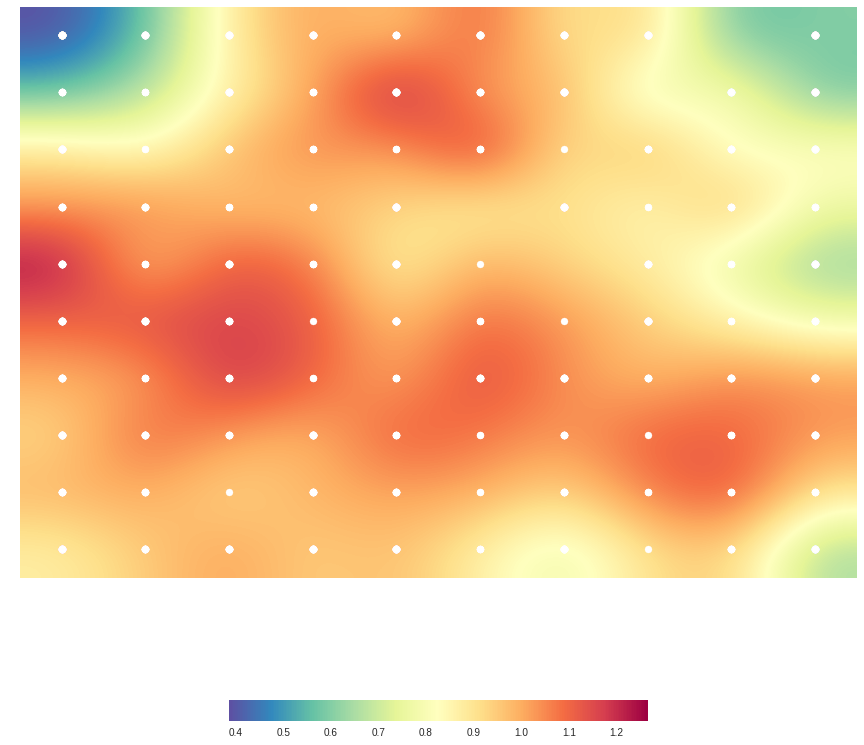

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [36]:
#Εμφανίζουμε τον αρχικό χάρτη, πριν το clustering
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))


## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [0]:
from sklearn.cluster import KMeans
k = 25
algorithm = KMeans(k)
som.cluster(algorithm=algorithm)


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιούμε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Εμφανίζουμε τη λεζάντα του U-matrix με το όρισμα `colorbar`. 

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώνουμε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort`  εκτυπώνουμε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων.

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



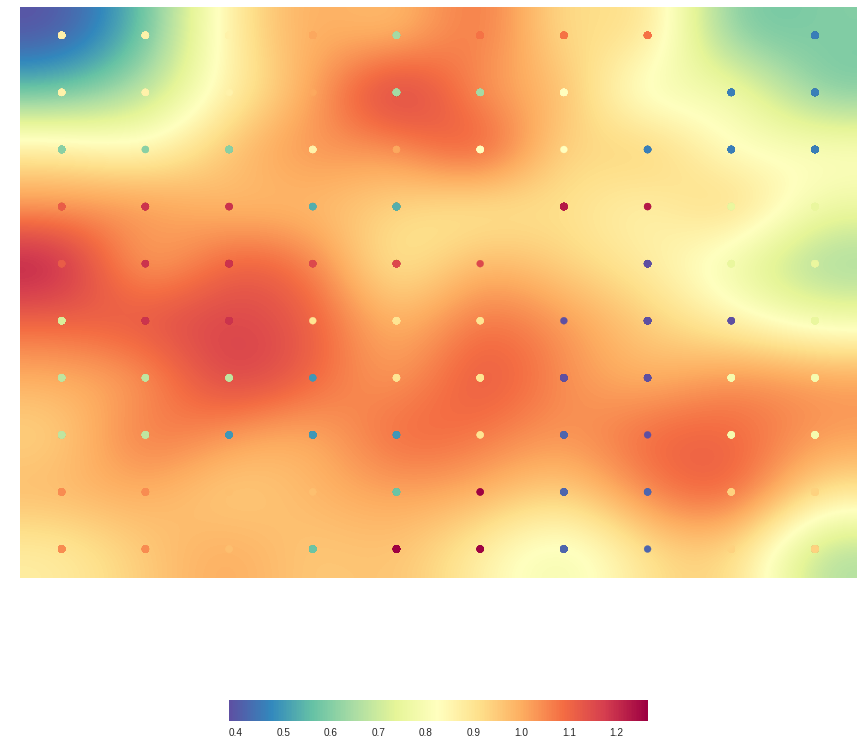

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [38]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [39]:
print(som.clusters)

[[13 13 13 17  7 19 19 19  2  2]
 [13 13 13 17  7  7 12  2  2  2]
 [ 6  6  6 13 17 12 12  2  2  2]
 [20 22 22  4  4  4 23 23 10 10]
 [20 22 22 21 21 21 23  0 10 10]
 [ 9 22 22 14 14 14  0  0  0 10]
 [ 8  8  8  3 14 14  0  0 11 11]
 [ 8  8  3  3  3 14  1  0 11 11]
 [18 18 16 16  5 24  1  1 15 15]
 [18 18 16  5 24 24  1  1 15 15]]


In [40]:
clusts, cc = np.unique(som.clusters, return_counts=True)
#print(clusts)
#print(cc)

neurons_idx = np.argsort(cc)

print("Cluster sorted by increasing number of neurons:\nCluster index \nNumber of neurons")
print(clusts[neurons_idx])
print(cc[neurons_idx])

Cluster sorted by increasing number of neurons:
Cluster index 
Number of neurons
[ 9 20  5 12 21 19 17 16 23 24  7  6  4 11 15 18  3 10  1  8 14 22 13  0
  2]
[1 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 5 5 5 6 6 7 7 8]



## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.


1. Ορίζουμε συνάρτηση `print_categories_stats` δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` και προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` βρίσκουμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack`φτιάχνουμε έναν πίνακα bmus για το cluster. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

In [0]:
def print_categories_stats(ids):
  cat = []
  for idd in ids:
    cats = categories.item(idd)  #make scalar
    #print(cats)
    cats = cats.split(',')
    #print(cats)
    for word in range(len(cats)):
      cats[word] = cats[word].strip(" ")
    cat.extend(cats)
    #print(cat)
    
  categ, counts = np.unique(cat, return_counts = True)
  sorted_index = np.argsort(counts)
  sorted_categ = [categ[i] for i in sorted_index]
  sorted_counts = [counts[i] for i in sorted_index]
  
  sorted_categ.reverse()
  sorted_counts.reverse()
  
  printable = []
  print("Overall Cluster Genres stats:")
  for i in range(0, len(sorted_categ)):
    cat_string = (sorted_categ[i], sorted_counts[i])
    printable.append(cat_string)
    
  print(printable)

In [0]:
#Για κάθε unique bmu βρίσκουμε τη θέση του στον πίνακα των bmus και άρα και το idd της ζητούμενης ταινίας
def bmu_similarity(unique_bmu):
  for idd in range(0, len(bmus)):
    if(unique_bmu[0] == bmus[idd][1] and  unique_bmu[1] == bmus[idd][0]):  #από την np.where και λόγω της σύμβασης των bmus πρέπει να πάρουμε τα indices ανάποδα
      return idd

In [0]:
def neuron_movies_report(neurons):
  ids = []
  for i in range(0, len(neurons)):
    for j in range(0, len(ubmus)):
      if(neurons[i][1] == ubmus[j][0] and neurons[i][0] == ubmus[j][1]):   #ελέγχουμε αν ο νευρώνας ανήκει στη λίστα των μοναδικών bmus
        ids.append(bmu_similarity(neurons[i]))
  #print(ids)
  print_categories_stats(ids)

In [0]:
def print_cluster_neurons_movies_report(cluster):
  cluster_bmus_indices = np.where(som.clusters == cluster)
  #print("Indices ", cluster_bmus_indices)
  cluster_bmus = np.column_stack(cluster_bmus_indices)
  #print("BMUS ", cluster_bmus)
  neuron_movies_report(cluster_bmus)
  

In [45]:
print_cluster_neurons_movies_report(2)

Overall Cluster Genres stats:
[('"Science Fiction"', 1), ('"Mystery"', 1), ('"Musical"', 1), ('"Fantasy"', 1), ('"Documentary"', 1), ('"Detective"', 1), ('"Detective fiction"', 1), ('"Crime Fiction"', 1), ('"Comedy film"', 1), ('"Bollywood"', 1)]


Παρακάτω θα προσπαθήσουμε να βελτιστοποιήσουμε το som και το clustering, τροποποιόντας τις παραμέτρους. Συγκεκριμένα θα δοκιμάσουμε για μεγέθη χάρτη και αριθμό k του k_means:
* som 20x20 και k=25, 30, 40, 50
* som 25x25 και k=25, 30, 40, 50
* som 30x30 και k=30, 40, 50

In [46]:
n_rows, n_columns = 30, 30
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(final_set, epochs = 100)

bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

CPU times: user 18min 1s, sys: 1.65 s, total: 18min 3s
Wall time: 9min 14s


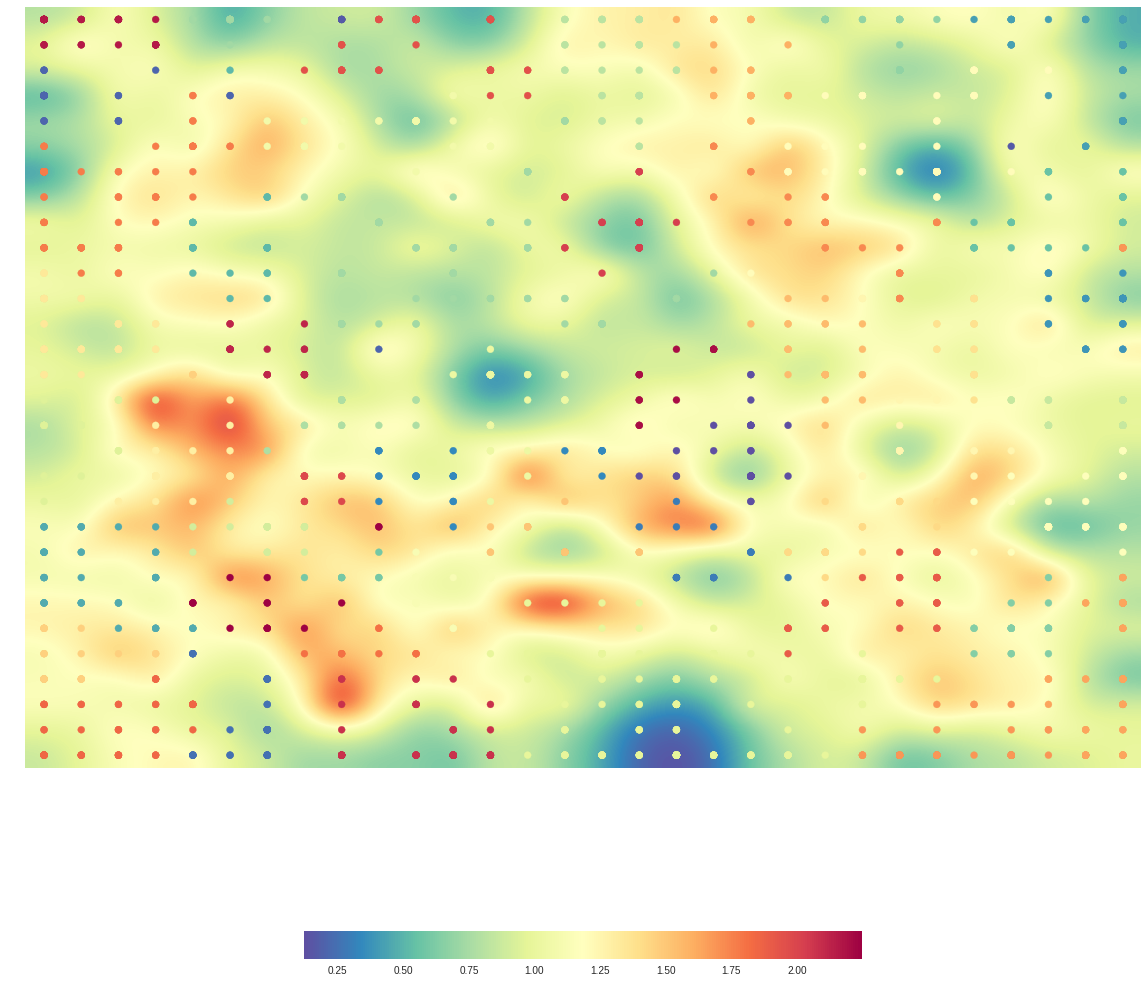

Cluster sorted by increasing number of neurons:
Cluster index 
Number of neurons
[ 1 11 43 39 31 47 18 49 48 23 17 12 13 15 46  2 30  6 27 34  4 32 19 40
 29 28 26  5  3 10 36 35 44  9 45  0 41 16  8  7 33 24 42 22 21 37 25 38
 20 14]
[ 4  5  7  8  9  9 10 11 11 11 11 12 13 13 13 14 14 14 14 15 15 16 16 16
 16 16 16 17 17 17 17 18 18 18 19 19 20 20 20 20 20 21 22 23 24 27 32 32
 63 67]


In [47]:
#from sklearn.cluster import KMeans
k = 50
algorithm = KMeans(k)
som.cluster(algorithm=algorithm)

som.view_umatrix(bestmatches=True, colorbar=True, figsize=(20, 20))

clusts, cc = np.unique(som.clusters, return_counts=True)
#print(clusts)
#print(cc)

neurons_idx = np.argsort(cc)

print("Cluster sorted by increasing number of neurons:\nCluster index \nNumber of neurons")
print(clusts[neurons_idx])
print(cc[neurons_idx])

In [53]:
print_cluster_neurons_movies_report(14)

Overall Cluster Genres stats:
[('"Short Film"', 7), ('"Comedy"', 6), ('"Black-and-white"', 3), ('"Indie"', 2), ('"Silent film"', 1), ('"Science Fiction"', 1), ('"Musical"', 1), ('"Horror"', 1), ('"Fantasy"', 1), ('"Animation"', 1), ('"Animated cartoon"', 1), ('"Adventure"', 1)]


Αυτό που παρατηρήσαμε από την παραπάνω διαδικασία είναι πως στους μεγάλους χάρτες με πολλούς νευρώνες, στα μεγάλύτερα clusters οι υποκατηγορίες δεν έχουν μεγάλη συνάφεια με την κύρια κατηγορία, αλλά κυρίως μεταξύ τους, ενώ τα μικρότερα clusters είχαν καλύτερη σημασιολογική συνάφεια, ιδίως για τα μικρότερα k. Όσο το k μεγάλωνε τα αποτελέσματα βελτιώνονταν αλλά παράλληλα και η πολυπλοκότητα αυξανόταν.

Τα **καλύτερα αποτελέσματα** και από άποψη ομαδοποίησης αλλά και λαμβάνοντας υπόψη και το χρόνο εκπαίδευσης τα πήραμε για **20χ20 χάρτη** και** k=30**. Με αυτές τις παραμέτρους αποφασίζουμε να εκπαιδεύσουμε όκληρο το dataset μας, όπως φαίνεται παρακάτω.

In [49]:
final_set = build_final_set()
final_set = pca.fit_transform(final_set)
print(final_set.shape)

(5000, 1500)


In [50]:
n_rows, n_columns = 20, 20
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(final_set, epochs = 100)

bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

CPU times: user 19min 59s, sys: 2.29 s, total: 20min 1s
Wall time: 10min 12s


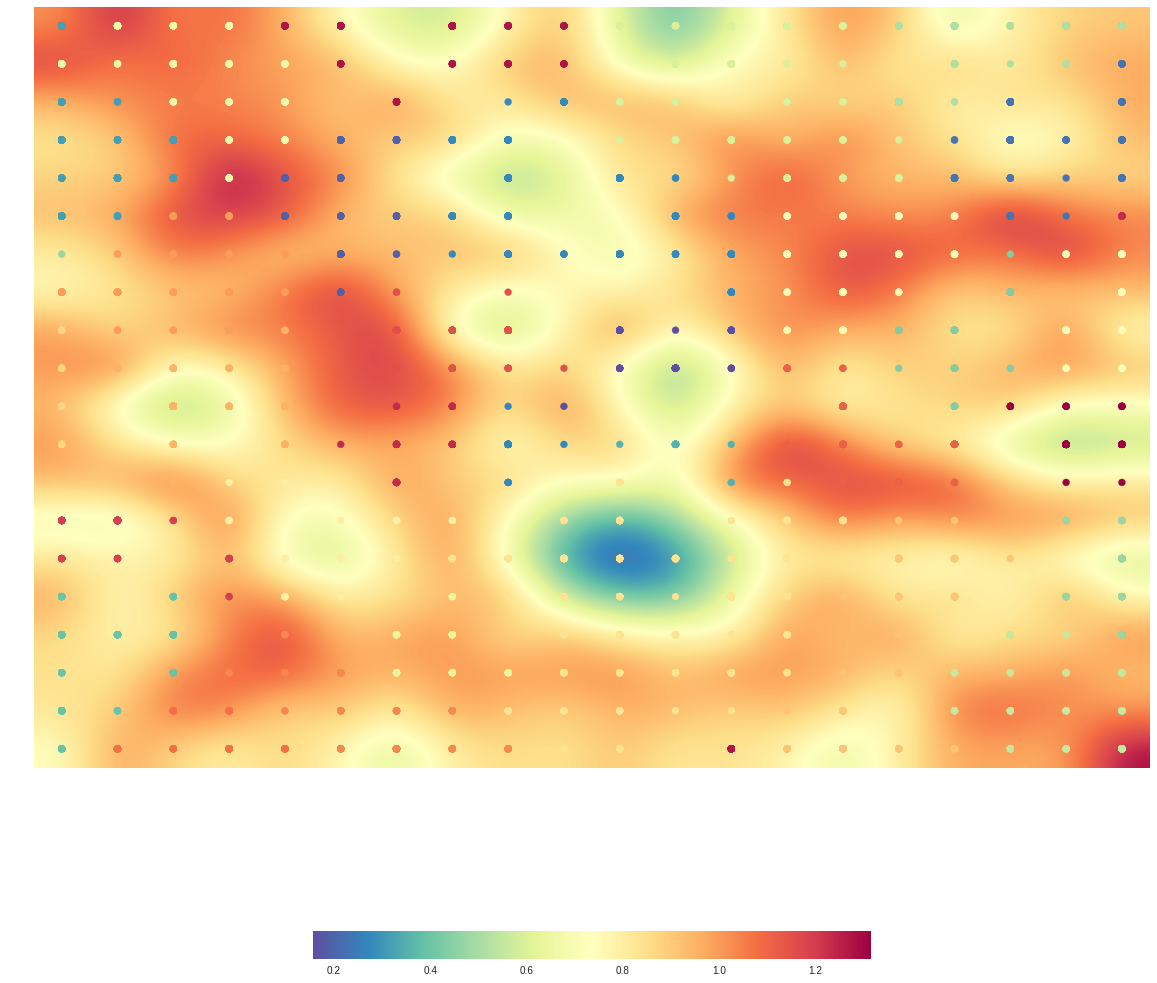

[[ 4 13 13 13 28 28 28 28 28 28 11 11 11 11 11  9  9  9  9  9]
 [13 13 13 13 13 28 28 28 28 28 11 11 11 11 11  9  9  9  9  2]
 [ 4  4 13 13 13  1 28 28  3  3 11 11 11 11 11  9  9  2  2  2]
 [ 4  4  4 13 13  1  1  3  3  3 11 11 11 11 11 11  2  2  2  2]
 [ 4  4  4 13  1  1  1  3  3  3  3  3 11 11 11 11  2  2  2  2]
 [ 4  4 21 21  1  1  1  3  3  3  3  3  3 15 15 15 15  2  2 27]
 [ 8 21 21 21 21  1  1  3  3  3  3  3  3 15 15 15 15  7 14 14]
 [21 21 21 21 21  1 25 25 25  3  3  3  3 15 15 15  7  7 14 14]
 [18 21 21 21 20 25 25 25 25 25  0  0  0 15 15  7  7  7 14 14]
 [18 20 20 20 20 20 25 25 25 25  0  0  0 24 24  7  7  7 14 14]
 [18 20 20 20 20 20 27 27  3  0  0  0  0 24 24 24  7 29 29 29]
 [18 18 20 20 20 27 27 27  3  3  5  5  5 24 24 24 24 29 29 29]
 [26 26 20 16 16 27 27 27  3 17 17  5  5 17 24 24 24 29 29 29]
 [26 26 26 16 16 16 16 16 17 17 17 17 17 17 17 19 19  8  8  8]
 [26 26 26 26 16 16 16 17 17 17 17 17 17 17 17 19 19 19  8  8]
 [ 6  6  6 26 16 16 12 12 17 17 17 17 17 17 19 19 19 10

In [51]:
k = 30
algorithm = KMeans(k)
som.cluster(algorithm=algorithm)

som.view_umatrix(bestmatches=True, colorbar=True, figsize=(20, 20))
print(som.clusters)

clusts, cc = np.unique(som.clusters, return_counts=True)
neurons_idx = np.argsort(cc)

print("Cluster sorted by increasing number of neurons:\nCluster index \nNumber of neurons")
print(clusts[neurons_idx])
print(cc[neurons_idx])

In [95]:
joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl')
joblib.dump(som, 'som.pkl')

['som.pkl']

In [96]:
!ls -hl

total 362M
-rw-r--r-- 1 root root 331M Jan 17 17:54 corpus_tf_idf.pkl
-rw-r--r-- 1 root root  31M Jan 17 17:54 som.pkl


In [0]:
files.download('som.pkl') 

In [52]:
#Για κάθε cluster καλούμε την print_cluster_neurons_movies_report() για να μας τυπώσει τις κατηγορίες του κάθε cluster

for i in range(0, len(clusts)):
  print("Cluster no. {}".format(i))
  print_cluster_neurons_movies_report(i)
  print("\n")

Cluster no. 0
Overall Cluster Genres stats:
[('"Comedy film"', 7), ('"Silent film"', 1), ('"Romance Film"', 1), ('"Musical"', 1), ('"Fantasy"', 1), ('"Family Film"', 1), ('"Crime Fiction"', 1)]


Cluster no. 1
Overall Cluster Genres stats:
[('"World cinema"', 5), ('"Science Fiction"', 5), ('"Action/Adventure"', 4), ('"Japanese Movies"', 2), ('"Adventure"', 2), ('"Western"', 2), ('"Horror"', 1), ('"Cavalry Film"', 1), ('"Comedy"', 1), ('"Coming of age"', 1), ('"Cult"', 1), ('"Fantasy"', 1), ('"Thriller"', 1), ('"Teen"', 1), ('"Monster movie"', 1), ('"Monster"', 1), ('"Natural horror films"', 1), ('"Romance Film"', 1), ('"War film"', 1), ('"Juvenile Delinquency Film"', 1)]


Cluster no. 2
Overall Cluster Genres stats:
[('"Drama"', 13), ('"Comedy"', 13), ('"Indie"', 3), ('"Black comedy"', 3), ('"Comedy-drama"', 3), ('"Family Film"', 2), ('"Film adaptation"', 2), ('"Road movie"', 2), ('"Romance Film"', 2), ('"Black-and-white"', 2), ('"Buddy film"', 1), ('"Boxing"', 1), ('"Avant-garde"', 1)



## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering έχουμε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής μας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook.


Παρακάτω θα εμφανίσουμε όλες τις μοναδικές κατηγορίες σε όλες τις ταινίες και τις συχνότητες εμφάνισής τους.

In [60]:
cat = []
for i in range(0, len(categories)):
  cats = categories.item(i)  #make scalar
  #print(cats)
  cats = cats.split(',')
  #print(cats)
  for word in range(len(cats)):
    cats[word] = cats[word].strip(" ")
  cat.extend(cats)

unique_categories, frequencies = np.unique(cat, return_counts = True)
indexes = np.argsort(frequencies)
print(unique_categories[indexes].shape)

unique_categories = [unique_categories[i] for i in indexes]
frequencies = [frequencies[i] for i in indexes]

unique_categories.reverse()
frequencies.reverse()

print(unique_categories)
print(frequencies)

(273,)
['"Drama"', '"Comedy"', '"Thriller"', '"Romance Film"', '"Action"', '"World cinema"', '"Crime Fiction"', '"Horror"', '"Action/Adventure"', '"Black-and-white"', '"Indie"', '"Adventure"', '"Short Film"', '"Family Film"', '"Musical"', '"Animation"', '"Science Fiction"', '"Mystery"', '"Romantic drama"', '"Comedy film"', '"Fantasy"', '"Romantic comedy"', '"Crime Thriller"', '"War film"', '"Comedy-drama"', '"Period piece"', '"Film adaptation"', '"Silent film"', '"Bollywood"', '"Western"', '"Japanese Movies"', '"Documentary"', '"Psychological thriller"', '"Chinese Movies"', '"Coming of age"', '"Family Drama"', '"Martial Arts Film"', '"Teen"', '"Black comedy"', '"Television movie"', '"Parody"', '"Children\'s/Family"', '"Slasher"', '"Suspense"', '"Cult"', '"Biographical film"', '"Film noir"', '"Biography"', '"Sports"', '"Supernatural"', '"Satire"', '"Creature Film"', '"Slapstick"', '"Children\'s"', '"Melodrama"', '"Political drama"', '"History"', '"Gangster Film"', '"Detective"', '"Actio


Από τα παραπάνω καταλήγουμε στα εξής συμπεράσματα:
1.   Οι συχνότερες κατηγορίες είναι **"Drama", "Comedy", "Thriller", "Action"**.  Πράγματι αυτές τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο. 

  Για παράδειγμα, η κατηγορία **"Drama"** φαίνεται να είναι η πρωταρχική στο **μεγαλύτερο cluster 17** (με 42 νευρώνες συνολικά). (Εδώ να τονίσουμε πως δε συμαίνει πως και οι 42 νευρώνες απεικονίζουν ταινίες με genre drama αλλά η συχνότητα εμφάνισης σε αυτό το cluster είναι υψηλή και συγκεκριμένα εμφανίζεται 38 φορές.) Η κατηγορία αυτή πρωταγωνιστεί επίσης και στα **clusters 2, 6 και 19** που συμπεριλαμβάνονται και αυτά στα μεγαλύτερα clusters του som.
  
  Πρωταρχική κατηγορία του **3ου μεγαλύτερου cluster (με ID 11)** είναι η **"Comedy"** (με συνολικές εμφανίσεις σε 23 από τους 25 νευρώνες), η οποία απαντάται επίσης και σε άλλα μεγάλα clusters όπως είναι τα **0, 2, 9, 11** .
  
  Όσον αφορά τις **λιγότερο συχνές** κατηγορίες αυτές είναι οι **"Jukebox musical" και "Epic Western"**. Παρατηρούμε για την πρώτη πως εμφανίζεται **μόνο στο cluster 9** (με συχνότητα 1), ενώ η δεύτερη δεν απαντάται σε κανένα cluster.
  
  
2.   **Μακρινά πρότυπα εισόδου** τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη.

  Για παράδειγμα, το **cluster 4** χαρακτηρίζεται από τις κατηγορίες **"Thriller", "Action", "Action/Adventure",  "Crime Fiction",  "Crime Thriller"** και βρίσκεται **πάνω και αριστερά** στο χάρτη. Στη απέναντι γωνία, **πάνω και δεξιά** είναι το **cluster 9** που έχει κατηγορίες **"Comedy", "Romance Film", "Romantic comedy", "Drama"**. 
  
  
3. **Κοντινά πρότυπα εισόδου** τείνουν να απεικονίζονται κοντά στο χάρτη.
  
    Μπορούμε εύκολα να παρατηρήσουμε πως τα clusters ** 12 και 17 ** βρίσκονται το ένα δίπλα στο άλλο, ενώ οι κατηγορίες που τα αποτελούν είναι  **"Family Drama", "Drama", "World cinema"** και **('"Drama", "Television movie", "Family Film", "War film" **  αντίστοιχα.
    
    Το ίδιο μπορούμε να πούμε και για τα **28 και 13**, τα οποία έχουν κοινές κύριες κατηγορίες τις **"Action", "Adventure"**.
    
___
Φυσικά η τέλεια απεικόνιση 2 διαστάσεων δεν είναι εφικτή και δε σέβεται μια απόλυτη τοπολογία.

Υπάρχουν clusters που δεν έχουν σαφή χαρακτηριστικά, για παράδειγμα:

**Cluster no. 27**

Overall Cluster Genres stats:

[('"Indie"', 6), ('"Black-and-white"', 6), ('"Silent film"', 4), ('"Short Film"', 2), ('"Western"', 1), ('"Parody"', 1), ('"Language & Literature"', 1), ('"Drama"', 1), ('"Documentary"', 1), ('"Comedy"', 1), ('"Biography"', 1)]

όπου δε μπορούμε να εξάγουμε μια σαφή γενικότερη κατηγορία, αλλά και 

**Cluster no. 3**

Overall Cluster Genres stats:

[('"Silent film"', 4), ('"Romance Film"', 4), ('"Musical"', 4), ('"Family Film"', 3), ('"Chinese Movies"', 3), ('"Adventure"', 3), ('"Japanese Movies"', 2), ('"Crime Fiction"', 2), ('"Bollywood"', 2), ('"Religious Film"', 1), ('"Mystery"', 1), ('"Fantasy"', 1), ('"Drama"', 1), ('"Documentary"', 1), ('"Comedy film"', 1), ('"Black-and-white"', 1)]

όπου και πάλι είναι δύσκολο να εξάγουμε σαφή συμπεράσματα.

Αυτό μπορεί να οφείλεται στο γεγονός πως **μια ταινία μπορεί να εντάσσεται σε περισσότερες από μία κατηγορίες**, οι οποίες να έρχονται σε αντίθεση μεταξύ τους (π.χ. μια ταινία μπορεί να έχει κωμικά και δραματικά στοιχεία, ή ακόμα και να αποτελεί θρίλλερ αλλά να συνδιάζει και κωμωδία).
___

Ακόμα, υπάρχουν ομάδες που βρίσκονται κοντά μεταξύ τους αλλά των οποίων οι κατηγορίες δεν είναι κοντινές.
Τέτοιες είναι, για παράδειγμα οι:

**Cluster no. 20**

Overall Cluster Genres stats:

[('"Horror"', 11), ('"Zombie Film"', 2), ('"Psychological thriller"', 2), ('"World cinema"', 2), ('"Haunted House Film"', 2), ('"Science Fiction"', 1), ('"Mystery"', 1), ('"Indie"', 1), ('"Superhero movie"', 1), ('"Teen"', 1), ('"Drama"', 1), ('"Detective"', 1), ('"Detective fiction"', 1), ('"Cult"', 1), ('"Creature Film"', 1), ('"Comedy film"', 1), ('"Chinese Movies"', 1), ('"Black-and-white"', 1), ('"B-movie"', 1)]

και

**Cluster no. 25**

Overall Cluster Genres stats:

[('"Documentary"', 9), ('"Indie"', 2), ('"Biography"', 2), ('"Culture & Society"', 2), ('"Travel"', 1), ('"Black-and-white"', 1), ('"Chinese Movies"', 1), ('"Comedy film"', 1), ('"History"', 1), ('"World cinema"', 1), ('"Law & Crime"', 1), ('"Music"', 1), ('"Nature"', 1), ('"Political cinema"', 1), ('"Science Fiction"', 1), ('"Social issues"', 1), ('"Sports"', 1), ('"Anthropology"', 1)]

Αυτό αφενός μπορεί να οφείλεται στο γεγονός ότι δε μπορούμε να απεικονίσουμε ένα dataset με χιλιάδες χαρακτηριστικά σε 2 διαστάσεις με απόλυτη πιστότητα, αφετέρου στο γεγονός ότι κάποιες κατηγορίες μπορεί να μη ταιριάζουν με καμία άλλη, ώστε να απεικονιστεί κοντά σε αυτή (π.χ. τα ντοκυμαντέρ δε μπορούμε να πούμε πως βρίσκονται πιο κοντά σαν είδος με ένα δράμα ή με μια ταινία δράσης).



#Σημείωση
Επειδή δεν κατάφερα να συμπιέσω τον χάρτη (όπως εξήγησα και στο σχετικό email), επισυνάπτω εδώ [link](https://drive.google.com/file/d/14Wt7ti5aLAc0uWd_WjIPYGb0A-H0eQYS/view?usp=sharing) από όπου μπορείτε να τον κατεβάσετε.